<a href="https://colab.research.google.com/github/abhinavgairola/NLP_Timeseries/blob/main/Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import requests
#from urllib.request import urlopen, Request
#from bs4 import BeautifulSoup

In [2]:
#url = "https://finviz.com/quote.ashx"
#def request(ticker):
#  payload = {"t":ticker,'start':'2020-01-01','end':'2020-05-01'}
#  response = requests.get(url,params=payload,headers={'user-agent':"Customer"})
#  if response.status_code == 200:
#    return response

In [3]:
#soup = BeautifulSoup(request('AMZN').text, 'html.parser')

In [4]:
#soup.find(id='news-table')

In [5]:
#! git clone https://github.com/Kriyszig/financial-news-data.git

In [6]:
#!git clone https://github.com/duynht/financial-news-dataset.git

In [7]:
#cd financial-news-data

In [8]:
#!python main.py

In [9]:
#df.to_parquet('/content/drive/My Drive/News.gzip',compression='gzip')

In [10]:
#!python -m spacy download en_core_web_lg

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
df = pd.read_parquet('/content/drive/My Drive/News.gzip')

In [13]:

df.head(10)

Headline  ...                                            Article
0  Fed officials at odds on how long to keep rate...  ...  NEW YORK  (Reuters) - Top Federal Reserve offi...
1    Market finishes flat as Obama pushes regulation  ...  NEW YORK  (Reuters) - U.S. stocks ended little...
2           Euro's woes mixed blessing for carmakers  ...  GENEVA  (Reuters) - Global carmakers exporting...
3  Wells Fargo CEO '09 compensation more than dou...  ...  NEW YORK  (Reuters) - Wells Fargo & Co ( WFC.N...
4                    Molson noncommittal on cash use  ...  NEW YORK  (Reuters) - Molson Coors Brewing Co ...
5   Islamic finance must harmonize practices to grow  ...  SWEIMEH, Jordan, March 3 (Reuter) - Islamic ba...
6       Fewer sellers cut home prices in Feb: Zillow  ...  NEW YORK  (Reuters) - The percentage of U.S. h...
7      Austerity steps to ease, not end Greek crisis  ...  LONDON  (Reuters) - Austerity steps announced ...
8  Factbox: White House draft language on Volcker...  ...  WASHINGTON  (Reuters) - The Obama administrati...
9        EU exec yet to see new Greek austerity plan  ...  BRUSSELS  (Reuters) - The European Commission ...

[10 rows x 5 columns]

In [14]:
Data_Article_Headline = df[['Date','Headline','Article']].sort_values(by='Date',ascending=False)

In [15]:
Data_Article_Headline['Headline'].head(5)

43749        Goldman CEO warns against regulatory overkill
43731                     Home loan demand at 3-month high
31069      Texas Instruments raises forecasts, shares rise
43720    July consumer credit falls a record $21.6 billion
43727        Bernanke's back but Obama can still shape Fed
Name: Headline, dtype: object

In [16]:
import re 
pattern = re.compile(r'[,\:,\',\"""",\;]')
pattern_2 = re.compile(r'(text|quotebox)')
Headline = []
#count = 0
for text in (Data_Article_Headline.Headline):
  text_2 = re.sub(pattern,'',text.lower())
  text_2 = re.sub(pattern_2,'',text_2)
  Headline.append(text_2)
Data_Article_Headline['Headline_2']=Headline

### 

In [17]:
Data_Article_Headline['Headline_2'].head(10)

43749        goldman ceo warns against regulatory overkill
43731                     home loan demand at 3-month high
31069       texas instruments raises forecasts shares rise
43720    july consumer credit falls a record $21.6 billion
43727         bernankes back but obama can still shape fed
31065                        opec end of meeting statement
43740                    talbots shares rise after results
31072             opec agrees to keep oil output unchanged
43752        another financial crisis inevitable greenspan
43735    kraft seeks $8 billion financing for cadbury b...
Name: Headline_2, dtype: object

In [18]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_lg")
lemmatizer = nlp.Defaults.create_lemmatizer()
Data_Lemmatize = np.copy(Data_Article_Headline['Headline_2'])
for i,word in enumerate(Data_Lemmatize):
  temp = word.split()
  temp_2 = [lemmatizer.lookup(word) for word in temp]
  temp_2 = " ".join(temp_2)
  Data_Lemmatize[i]=temp_2
Data_Article_Headline['Lemmatize_hd'] = Data_Lemmatize
Data_Article_Headline['Lemmatize_hd'].head(10)
#[lemmatizer.lookup(word) for word in Data_Lemmatize]

43749        goldman ceo warns against regulatory overkill
43731                     home loan demand at 3-month high
31069       texas instruments raises forecasts shares rise
43720    july consumer credit falls a record $21.6 billion
43727         bernankes back but obama can still shape fed
31065                        opec end of meeting statement
43740                    talbots shares rise after results
31072             opec agrees to keep oil output unchanged
43752        another financial crisis inevitable greenspan
43735    kraft seeks $8 billion financing for cadbury b...
Name: Lemmatize_hd, dtype: object

In [19]:
print("Processing..")
from tqdm import tqdm
Vector = {}
for Headline in tqdm(Data_Article_Headline['Lemmatize_hd']):
  #print(Headline)
  doc = nlp(Headline)
  #print("Translating the Headline {} and vector shape is {}".format(Headline, doc.vector.shape))
  Vector[Headline]=doc.vector
    

  0%|          | 0/106494 [00:00<?, ?it/s]

Processing..


100%|██████████| 106494/106494 [30:03<00:00, 59.04it/s]


In [35]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
ke=list(Vector.keys())
Vector[ke[0]].shape
Vector


{'goldman ceo warns against regulatory overkill': array([-5.14144957e-01,  1.74521983e-01,  5.68436682e-02,  1.06871329e-01,
        -1.41202673e-01, -8.63284990e-02,  2.40247503e-01, -9.49850082e-02,
        -1.63573325e-02,  1.39050162e+00, -9.40086544e-02, -4.46171671e-01,
         1.10198714e-01,  6.27254993e-02,  3.21018361e-02, -5.63621707e-02,
         6.79353327e-02,  2.90875167e-01,  1.46971658e-01,  1.86277509e-01,
         8.39150026e-02,  3.10640991e-01,  2.10843325e-01, -2.93250322e-01,
        -7.26448148e-02, -2.14925855e-02, -1.58950016e-01,  2.70191669e-01,
         2.67166663e-02,  1.36016554e-03, -4.04383279e-02, -3.06063816e-02,
         9.03894901e-02, -8.39514062e-02,  2.39846349e-01,  4.63230014e-02,
        -1.14276059e-01,  2.39118445e-03, -1.01321317e-01, -2.06071675e-01,
         1.90865681e-01, -1.27571672e-02, -9.96331335e-04,  1.11633362e-02,
         1.04778163e-01, -1.24816664e-01,  1.24502003e-01,  1.47838369e-02,
         5.33386655e-02,  8.21656063e-0

In [22]:
ke= list(Vector.keys())
import numpy as np
import cupy as cp

In [23]:
ke = list(Vector.keys())
for i in ke:
  Vector[i] = cp.asnumpy(Vector[i])

In [24]:
Headlines_to_vector = pd.DataFrame(Vector)

In [25]:
Headlines_to_vector.head(5)

goldman ceo warns against regulatory overkill  ...  ireland put on credit watch negative by fitch
0                                      -0.514145  ...                                      -0.359498
1                                       0.174522  ...                                       0.166237
2                                       0.056844  ...                                      -0.241063
3                                       0.106871  ...                                       0.006941
4                                      -0.141203  ...                                       0.074610

[5 rows x 98208 columns]

In [26]:
Headlines_to_vector_transposed = Headlines_to_vector.T

In [27]:
Data_Article_Headline[Data_Article_Headline.Headline.str.contains('Goldman')].sort_values(by='Date')

Date  ...                                       Lemmatize_hd
98165    Fri Apr 1, 2011 1:21am EDT  ...  morgan stanley goldman to recommend say on pay...
98134    Fri Apr 1, 2011 7:23pm EDT  ...  goldman ceo awarded $14.12 million compensatio...
82513    Fri Apr 1, 2011 9:27pm EDT  ...  goldman ceo awarded $14.12 million compensatio...
88163  Fri Apr 10, 2009 10:34am EDT  ...  goldman sachs mulls stock sale to repay tarp m...
34172   Fri Apr 12, 2013 7:48pm EDT  ...  goldman ceo blankfein got 75 percent compensat...
...                             ...  ...                                                ...
88644   Wed Sep 8, 2010 12:34pm EDT  ...        glaxo hires goldman sachs banker as new cfo
88642    Wed Sep 8, 2010 1:39pm EDT  ...  goldman ny proprietary traders consider next move
88619    Wed Sep 8, 2010 5:25pm EDT  ...     goldman sachs fined $30.9 million in uk report
43751    Wed Sep 9, 2009 6:36pm EDT  ...         goldman boss says anger over pay justified
43749    Wed Sep 9, 2009 9:48am EDT  ...      goldman ceo warns against regulatory overkill

[1176 rows x 5 columns]

In [28]:
Headlines_to_vector.to_numpy()

array([[-0.51414496, -0.49339166, -0.40024266, ...,  0.02973291,
         0.00223434, -0.3594976 ],
       [ 0.17452198,  0.27698   ,  0.35676786, ..., -0.1275007 ,
         0.34336877,  0.16623664],
       [ 0.05684367, -0.06949583,  0.0318045 , ..., -0.0192307 ,
         0.00139462, -0.24106263],
       ...,
       [ 0.05386165, -0.22550501, -0.40018198, ..., -0.26053688,
         0.05911237, -0.01042075],
       [-0.02591332,  0.016601  ,  0.18241817, ..., -0.057705  ,
        -0.1456455 , -0.17169337],
       [ 0.06801099, -0.05191733, -0.07230403, ...,  0.309778  ,
         0.15916689,  0.17444113]], dtype=float32)

This is cluster2
This is cluster3
This is cluster4
This is cluster5
This is cluster6
This is cluster7
This is cluster8
This is cluster9


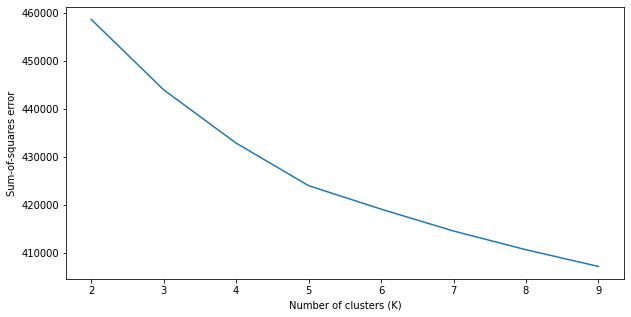

In [32]:
from sklearn.cluster import KMeans
#import numpy as np
x_cols = Headlines_to_vector_transposed.to_numpy()
S =[]
cluster_assignment = {}
for k in range(2,10):
    print("This is cluster{}".format(k))
    model = KMeans(n_clusters=k)
    fitted = model.fit(x_cols)
    predict = fitted.predict(x_cols)## points belonging to which cluster
    centers = model.cluster_centers_
    center_cluster = centers[predict]## To which cluster center belongs too
    S.append(np.sum((x_cols-center_cluster)**2))## Get the SS for the current value of 'k'
    cluster_assignment[str(k)]=predict
plt.figure(figsize=(10,5))
plt.plot(range(2,10),S)
plt.ylabel(r'Sum-of-squares error')
plt.xlabel(r'Number of clusters (K)')
plt.show()

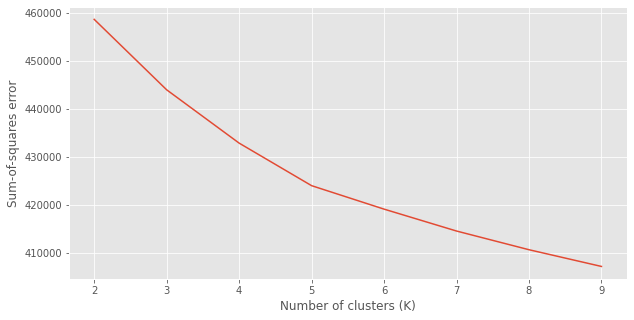

In [36]:
plt.figure(figsize=(10,5))
#plt.axvline(25,color='red')
plt.plot(range(2,len(S)+2),S)
plt.ylabel(r'Sum-of-squares error')
plt.xlabel(r'Number of clusters (K)')
plt.show()

In [37]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(x_cols)
kmeans = KMeans(n_clusters=10)
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

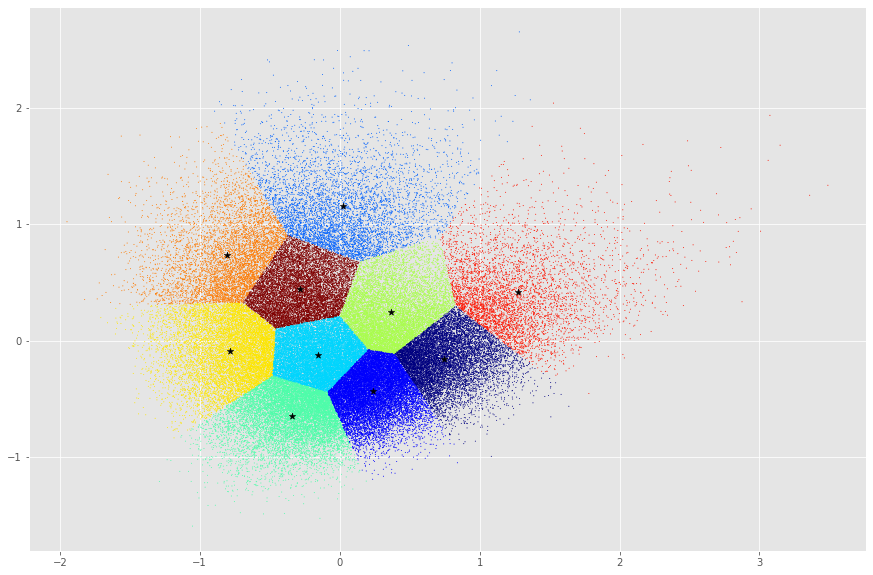

In [65]:
plt.figure(figsize=(15,10))
centers = kmeans.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=0.2, cmap='jet')
plt.scatter(centers[:,0],centers[:,1],c='black',s=45,marker='*')
#help(plt.scatter)

In [71]:
kmeans = KMeans(n_clusters=25)
fitted = kmeans.fit(x_cols)
prediction = kmeans.predict(x_cols)

### The ordering of the vectors is preserved by the kmeans labels. Considering this we can use the index of the Headlines_to_vector and zip them with labels.

In [72]:
result = zip(kmeans.labels_,Headlines_to_vector_transposed.index )

In [73]:
DataFrame = pd.DataFrame({'label':kmeans.labels_,'sentence':Headlines_to_vector_transposed.index})

In [86]:
DataFrame[DataFrame['label']==4]['sentence']

4             bernankes back but obama can still shape fed
29       feds fisher no plan in mind for velocity of ra...
40               bp says report not about blame then names
51               bp probe to spread blame for spill report
60       flash crash report plunge still a mystery sources
                               ...                        
98147    u.s. sec asks if options can undermine short c...
98170       japan plans to bail out stricken nuclear plant
98183     american apparel says it may file for bankruptcy
98187    nasdaq sees scale but companies worry about ch...
98198         feds dudley sees no reason to reverse course
Name: sentence, Length: 7067, dtype: object

In [ ]:
DataFrame_2 = pd.DataFrame(dict(result),index=[0])

In [ ]:
melt=DataFrame_2.melt()

In [ ]:
DataFrame_2